<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Shifting-K-space" data-toc-modified-id="Shifting-K-space-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Shifting K-space</a></span><ul class="toc-item"><li><span><a href="#Generating-k-space-Data" data-toc-modified-id="Generating-k-space-Data-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Generating k-space Data</a></span></li><li><span><a href="#DICOM-Files" data-toc-modified-id="DICOM-Files-0.1.2"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>DICOM Files</a></span></li></ul></li></ul></li><li><span><a href="#Phase-Ramp" data-toc-modified-id="Phase-Ramp-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Phase Ramp</a></span><ul class="toc-item"><li><span><a href="#Applying-Phase-Shift" data-toc-modified-id="Applying-Phase-Shift-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Applying Phase Shift</a></span></li><li><span><a href="#View-Shifts" data-toc-modified-id="View-Shifts-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>View Shifts</a></span><ul class="toc-item"><li><span><a href="#Images-of-Raw-K-space" data-toc-modified-id="Images-of-Raw-K-space-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Images of Raw K-space</a></span></li></ul></li><li><span><a href="#Correcting-for-Orientation" data-toc-modified-id="Correcting-for-Orientation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correcting for Orientation</a></span><ul class="toc-item"><li><span><a href="#Transpose" data-toc-modified-id="Transpose-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Transpose</a></span></li></ul></li><li><span><a href="#Flip" data-toc-modified-id="Flip-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Flip</a></span></li><li><span><a href="#Transformation-to-match-DICOM-Image" data-toc-modified-id="Transformation-to-match-DICOM-Image-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Transformation to match DICOM Image</a></span></li></ul></li><li><span><a href="#Alternative-Ramp-Function" data-toc-modified-id="Alternative-Ramp-Function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Alternative Ramp Function</a></span></li></ul></div>

# K-Space and Phase Shift

In [1]:
import BrukerMRI as bruker
import pylab as pl
#Python method of extracting raw Bruker Files
import BrukerMRI as bruker
import plot
# Modules
import pandas as pd
import pydicom as dcm
import math
import numpy as np
import matplotlib.pyplot as plt
import glob
from os.path import expanduser
import os
from matplotlib import cm
import cmath

### Shifting K-space

#### Generating k-space Data

In [2]:
# copy and paste entire directory but replace "\" with "/"
# Place a "/" at the end of the line
MainDir = "C:/Users/daniala/Desktop/mri/20191210_104049_MRMD_phantom_practice_1_3/"
ExpNum = 8
Experiment = bruker.ReadExperiment(MainDir, ExpNum)
acqp = Experiment.acqp
method = Experiment.method
raw_fid = Experiment.raw_fid
k_space_gen = Experiment.GenerateKspace()
k_space = Experiment.k_data

#### DICOM Files

In [3]:
foldername = r"C:\Users\daniala\Desktop\mri\20191210_104049_MRMD_phantom_practice_1_3\8\pdata\1\dicom"

## Phase Ramp

In [4]:
def phase_ramp(del_x,del_y,k_sp):
    shape = k_sp.shape
    N_x = shape[0]
    N_y = shape[1]
    N_slices = shape[2]
    p_ramp = np.zeros((N_x,N_y),dtype='complex')
   
    kx = (np.linspace(0,N_x-1,N_x)-(N_x/2))/N_x
    for i in range(N_x):
        p_ramp[i,:] = np.exp(-1j*del_x*kx*2*np.pi)
        
    ky = (np.linspace(0,N_y-1,N_y)-(N_y/2))/N_y   
    for i in range(N_y):
        p_ramp[:,i] = p_ramp[:,i] * np.exp(-1j*del_y*ky*2*np.pi)
        
    return(p_ramp)

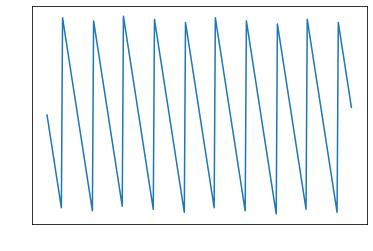

In [5]:
plt.plot(np.angle(phase_ramp(0,10,k_space)[:,0]))

### Applying Phase Shift

In [6]:
def phase_shift(del_x,del_y,k_sp):
    shape = k_sp.shape
    N_x = shape[0]
    N_y = shape[1]
    N_slices = shape[2]
    p_ramp = np.zeros((N_x,N_y),dtype='complex')

    kx = (np.linspace(0,N_x-1,N_x)-(N_x/2))/N_x
    for i in range(N_x):
        p_ramp[i,:] = np.exp(-1j*del_x*kx*2*np.pi)
        
    ky = (np.linspace(0,N_y-1,N_y)-(N_y/2))/N_y   
    for i in range(N_y):
        p_ramp[:,i] = p_ramp[:,i] * np.exp(-1j*del_y*ky*2*np.pi)
    
    k_s_s = np.zeros((N_x,N_y,N_slices),dtype='complex')
    for i in range(N_slices):
        k_s_s[:,:,i] = np.multiply(k_sp[:,:,i],p_ramp[:,:])
    
    return(k_s_s)

In [7]:
# Apply Phase Shfit to View the appropriate Shift
k_ss = phase_shift(120,0,k_space)
i_ksp = bruker.Reco_FLASH(k_space)
i_kss = bruker.Reco_FLASH(k_ss)

### View Shifts

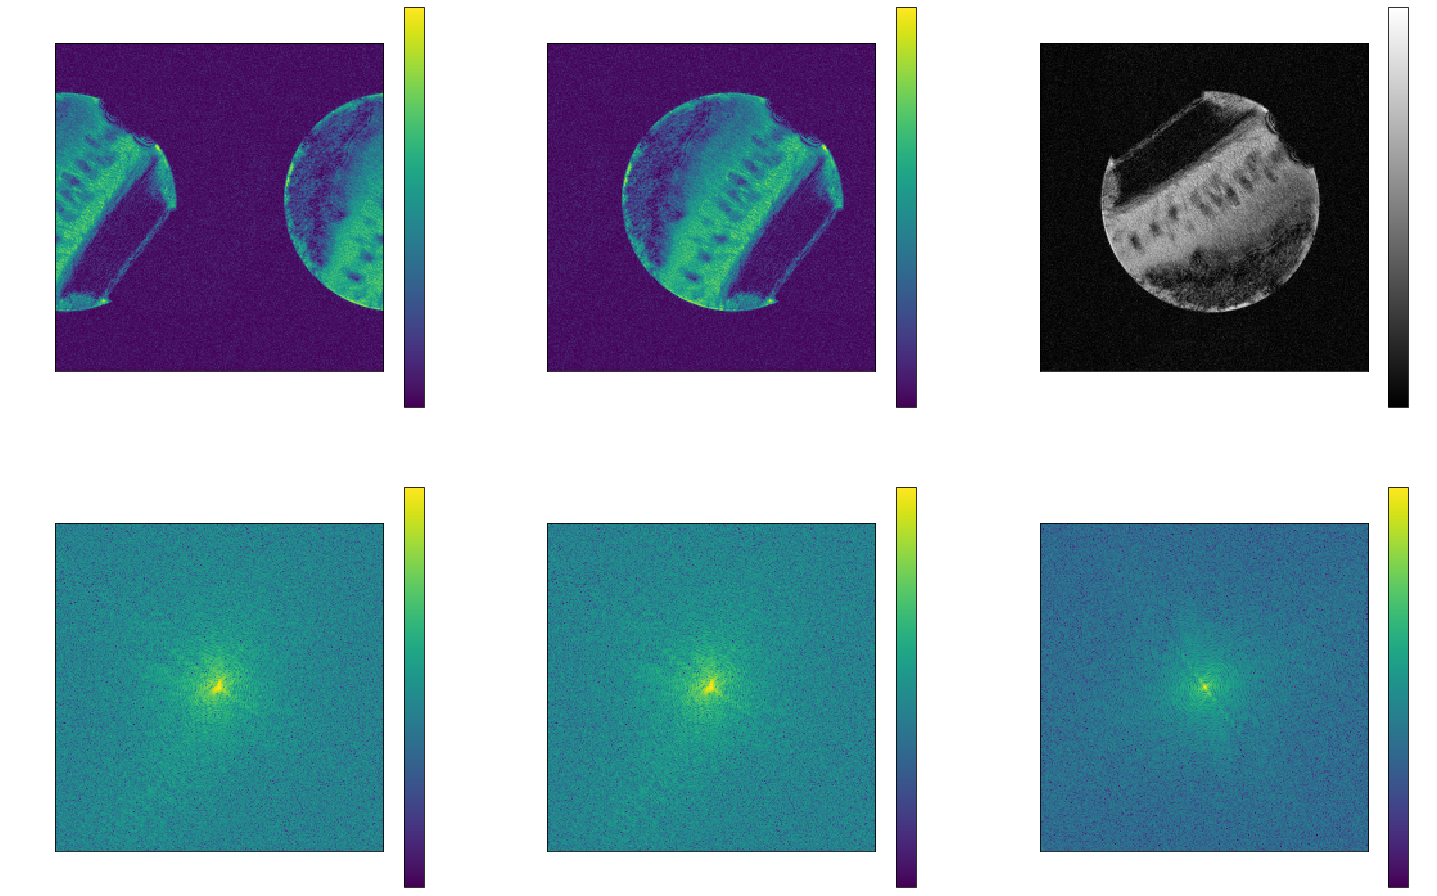

In [21]:
plt.figure(figsize=(25,25))
    
plt.subplot(331)
plt.title('Original k -space Image')
plot.plot_1_i_space(i_ksp[:,:,0])

plt.subplot(332)
plt.title('Shifted k -space Image')
plot.plot_1_i_space(i_kss[:,:,0])

plt.subplot(333)
plt.title('DICOM Image')
plot.Plot_1_Dcm(foldername)

plt.subplot(334)
plt.title('Original k -space')
plot.plot_1_k_space(k_space[:,:,0])

plt.subplot(335)
plt.title('Shifted k -space')
plot.plot_1_k_space(k_ss[:,:,0])

plt.subplot(336)
plt.title('DICOM k -space')
plot.plot_1_k_space(np.fft.fftshift(np.fft.fft2(plot.Dcm_image(foldername)[:,:])))

#### Images of Raw K-space

After shifting the image in the y-axis by a 120 mm by multiplying the phase ramp the image has centered to a position similar to the DICOM image. The raw data converted to image however is still of different orientation. Multiplying a phase ramp to the k-space by Fourier transform causes a translation in the y and x axis to the image.

### Correcting for Orientation

To correct for the orientation of the image, transformation of the image space matrix is done

#### Transpose

Text(0.5, 1.0, 'Image from DICOM')

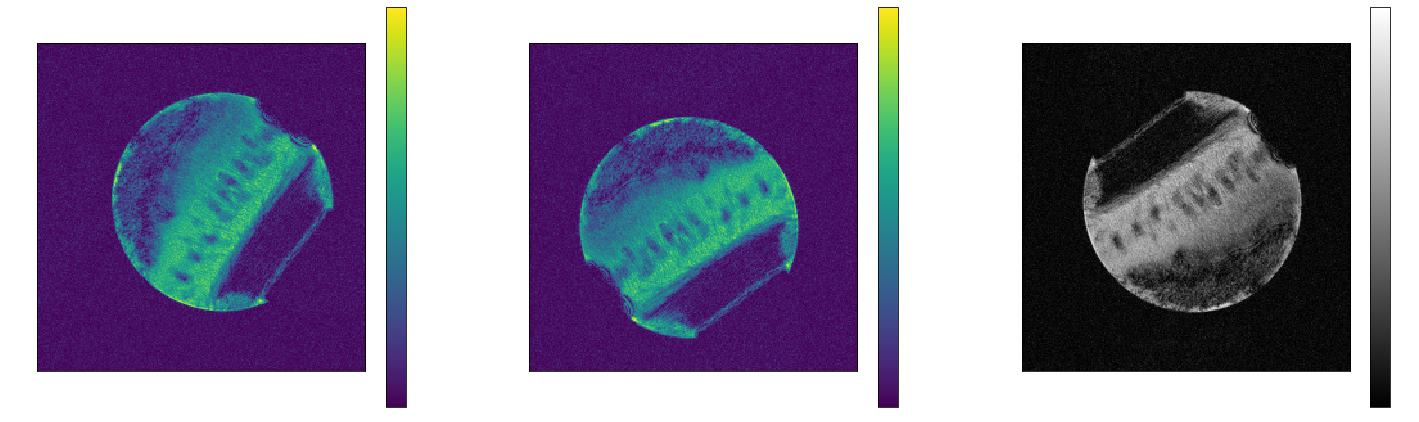

In [22]:

t = np.transpose(i_kss[:,:,0])

plt.figure(figsize=(25,25))

plt.subplot(331)
plt.imshow(abs(i_kss[:,:,0]/100000))
plt.title('Image of Shifted k Space')
plt.colorbar()

plt.subplot(332)
plt.imshow(abs(t[:,:]/100000))
plt.title('Transposed Image Space')
plt.colorbar()

plt.subplot(333)
plot.Plot_1_Dcm(foldername)
plt.title('Image from DICOM')


The image can also be rotated by using the flip function which reverse the order of elements in an array along the given axis. The shape of the array is preserved, but the elements are reordered.

### Flip

In [24]:
vert = np.flip(i_kss[:,:,0],0)
hor = np.flip(i_kss[:,:,0],1)
pos_1 = np.flip(i_kss[:,:,0],(1,0))
pos_2 = np.flip(i_kss[:,:,0],(0,1))
#flips = [flip_vertical,flip_horizontal,flip_by_position,flip_by_position2]
flip_title ={'K-Space Shifted':i_kss[:,:,0],'flip_vertical':vert,'flip_horizontal':hor,'flip_by_position':pos_1,'flip_by_position2':pos_2}

In [25]:
def comparison_flip_plots(i_spaces):
    key_list = list(i_spaces)
    plt.figure(figsize=(25,25))
    for key,value in i_spaces.items():
        plt.subplot(((300+21+key_list.index(key))))
        plt.imshow(abs(value[:,:]/100000))
        plt.title('Image of ' + key)
        plt.colorbar()
        

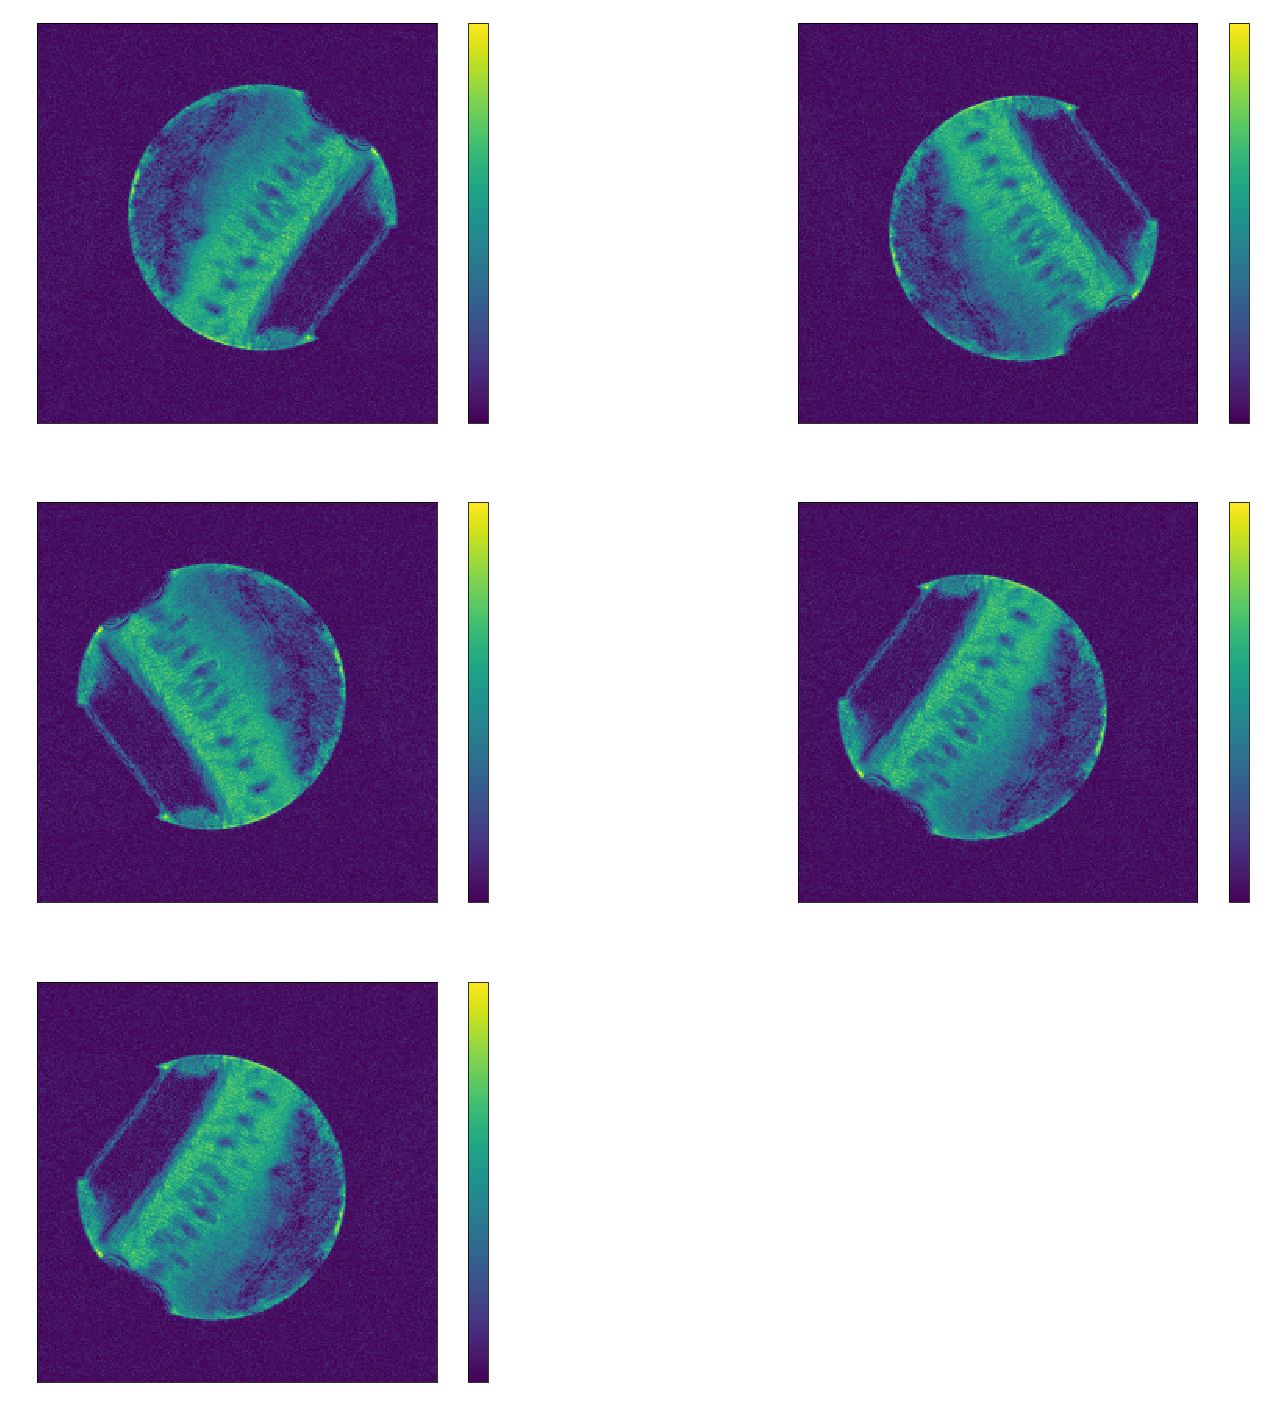

In [26]:
comparison_flip_plots(flip_title)

The images show a reflection of the image space in the:
    <p> 1. Central x-axis for the vertically flipped image
    <p> 2. Central y-axis for the horizontally flipped image
    <p> 3. About the bisector of the x and y-axis

### Transformation to match DICOM Image

In [27]:
# Image is flipped in the h
image_space = i_kss[:,:,0]
t_flip = np.flip(image_space,(1,0))
t_flip_transpose = np.transpose(t_flip)
dicm = plot.Dcm_image(foldername)

transform ={'K-Space Shifted':image_space,'Flipped by position':t_flip,
             'Flipped and Transposed':t_flip_transpose,'DICOM':dicm}


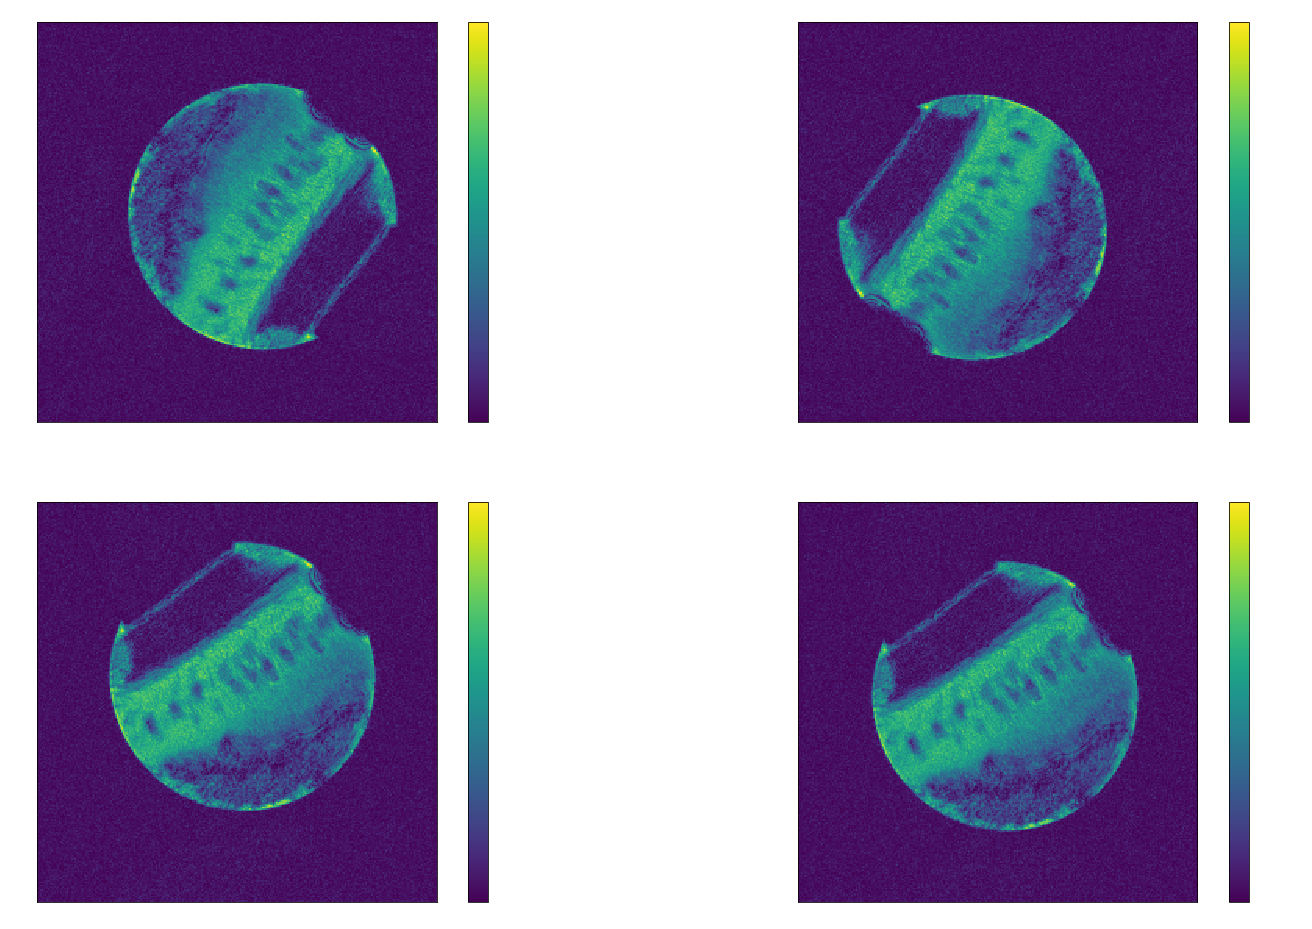

In [28]:
comparison_flip_plots(transform)

## Alternative Ramp Function

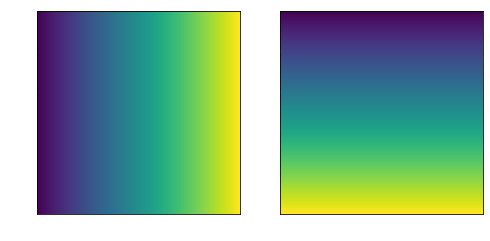

In [29]:
x = np.linspace(-256/2, (256/2)-1,256)/256
y = np.linspace(-256/2, (256/2)-1,256)/256
xv, yv = np.meshgrid(x, y)

plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(xv)

plt.subplot(122)
plt.imshow(yv)

In [30]:
p_ramp2 = np.exp(-1j*2*np.pi*(xv*10 + yv*120))
k_shift_2 = np.multiply(p_ramp2,k_space[:,:,0])

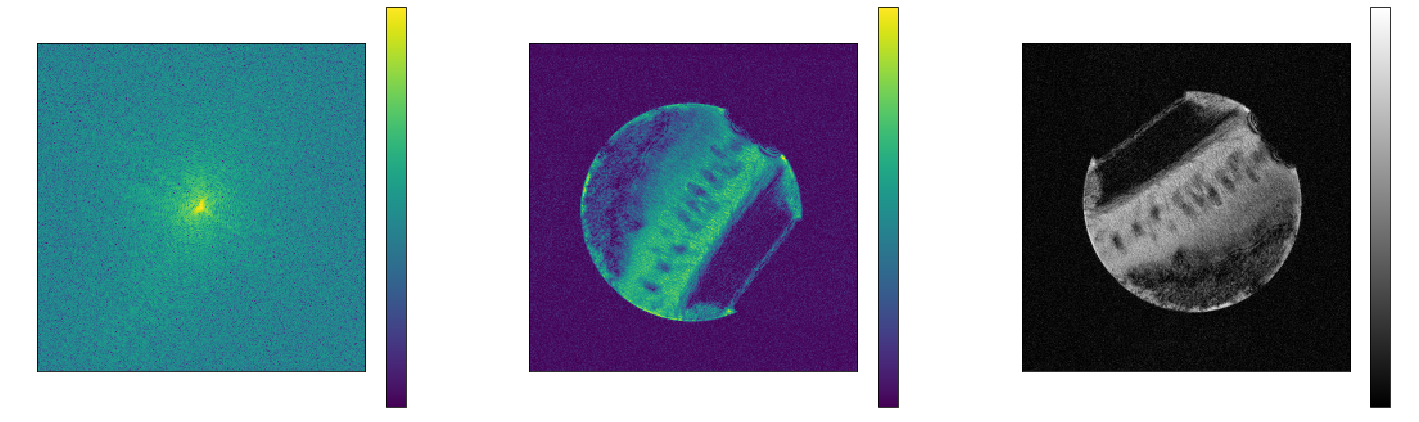

In [33]:
plt.figure(figsize=(25,25))
plt.subplot(331)
plt.imshow(np.log(1+np.abs(k_shift_2)))
plt.title('k-space')
plt.colorbar()

plt.subplot(332)
plt.imshow(abs(np.fft.fft2(k_shift_2))/100000)
plt.title('Shifted 2 Image')
plt.colorbar()

plt.subplot(333)
plot.Plot_1_Dcm(foldername)